In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_theme(style="ticks")


In [71]:
# Wine Dataset aus Sklearn-Bibliothek laden
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# Umwandeln in ein Pandas Dataframe
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [72]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

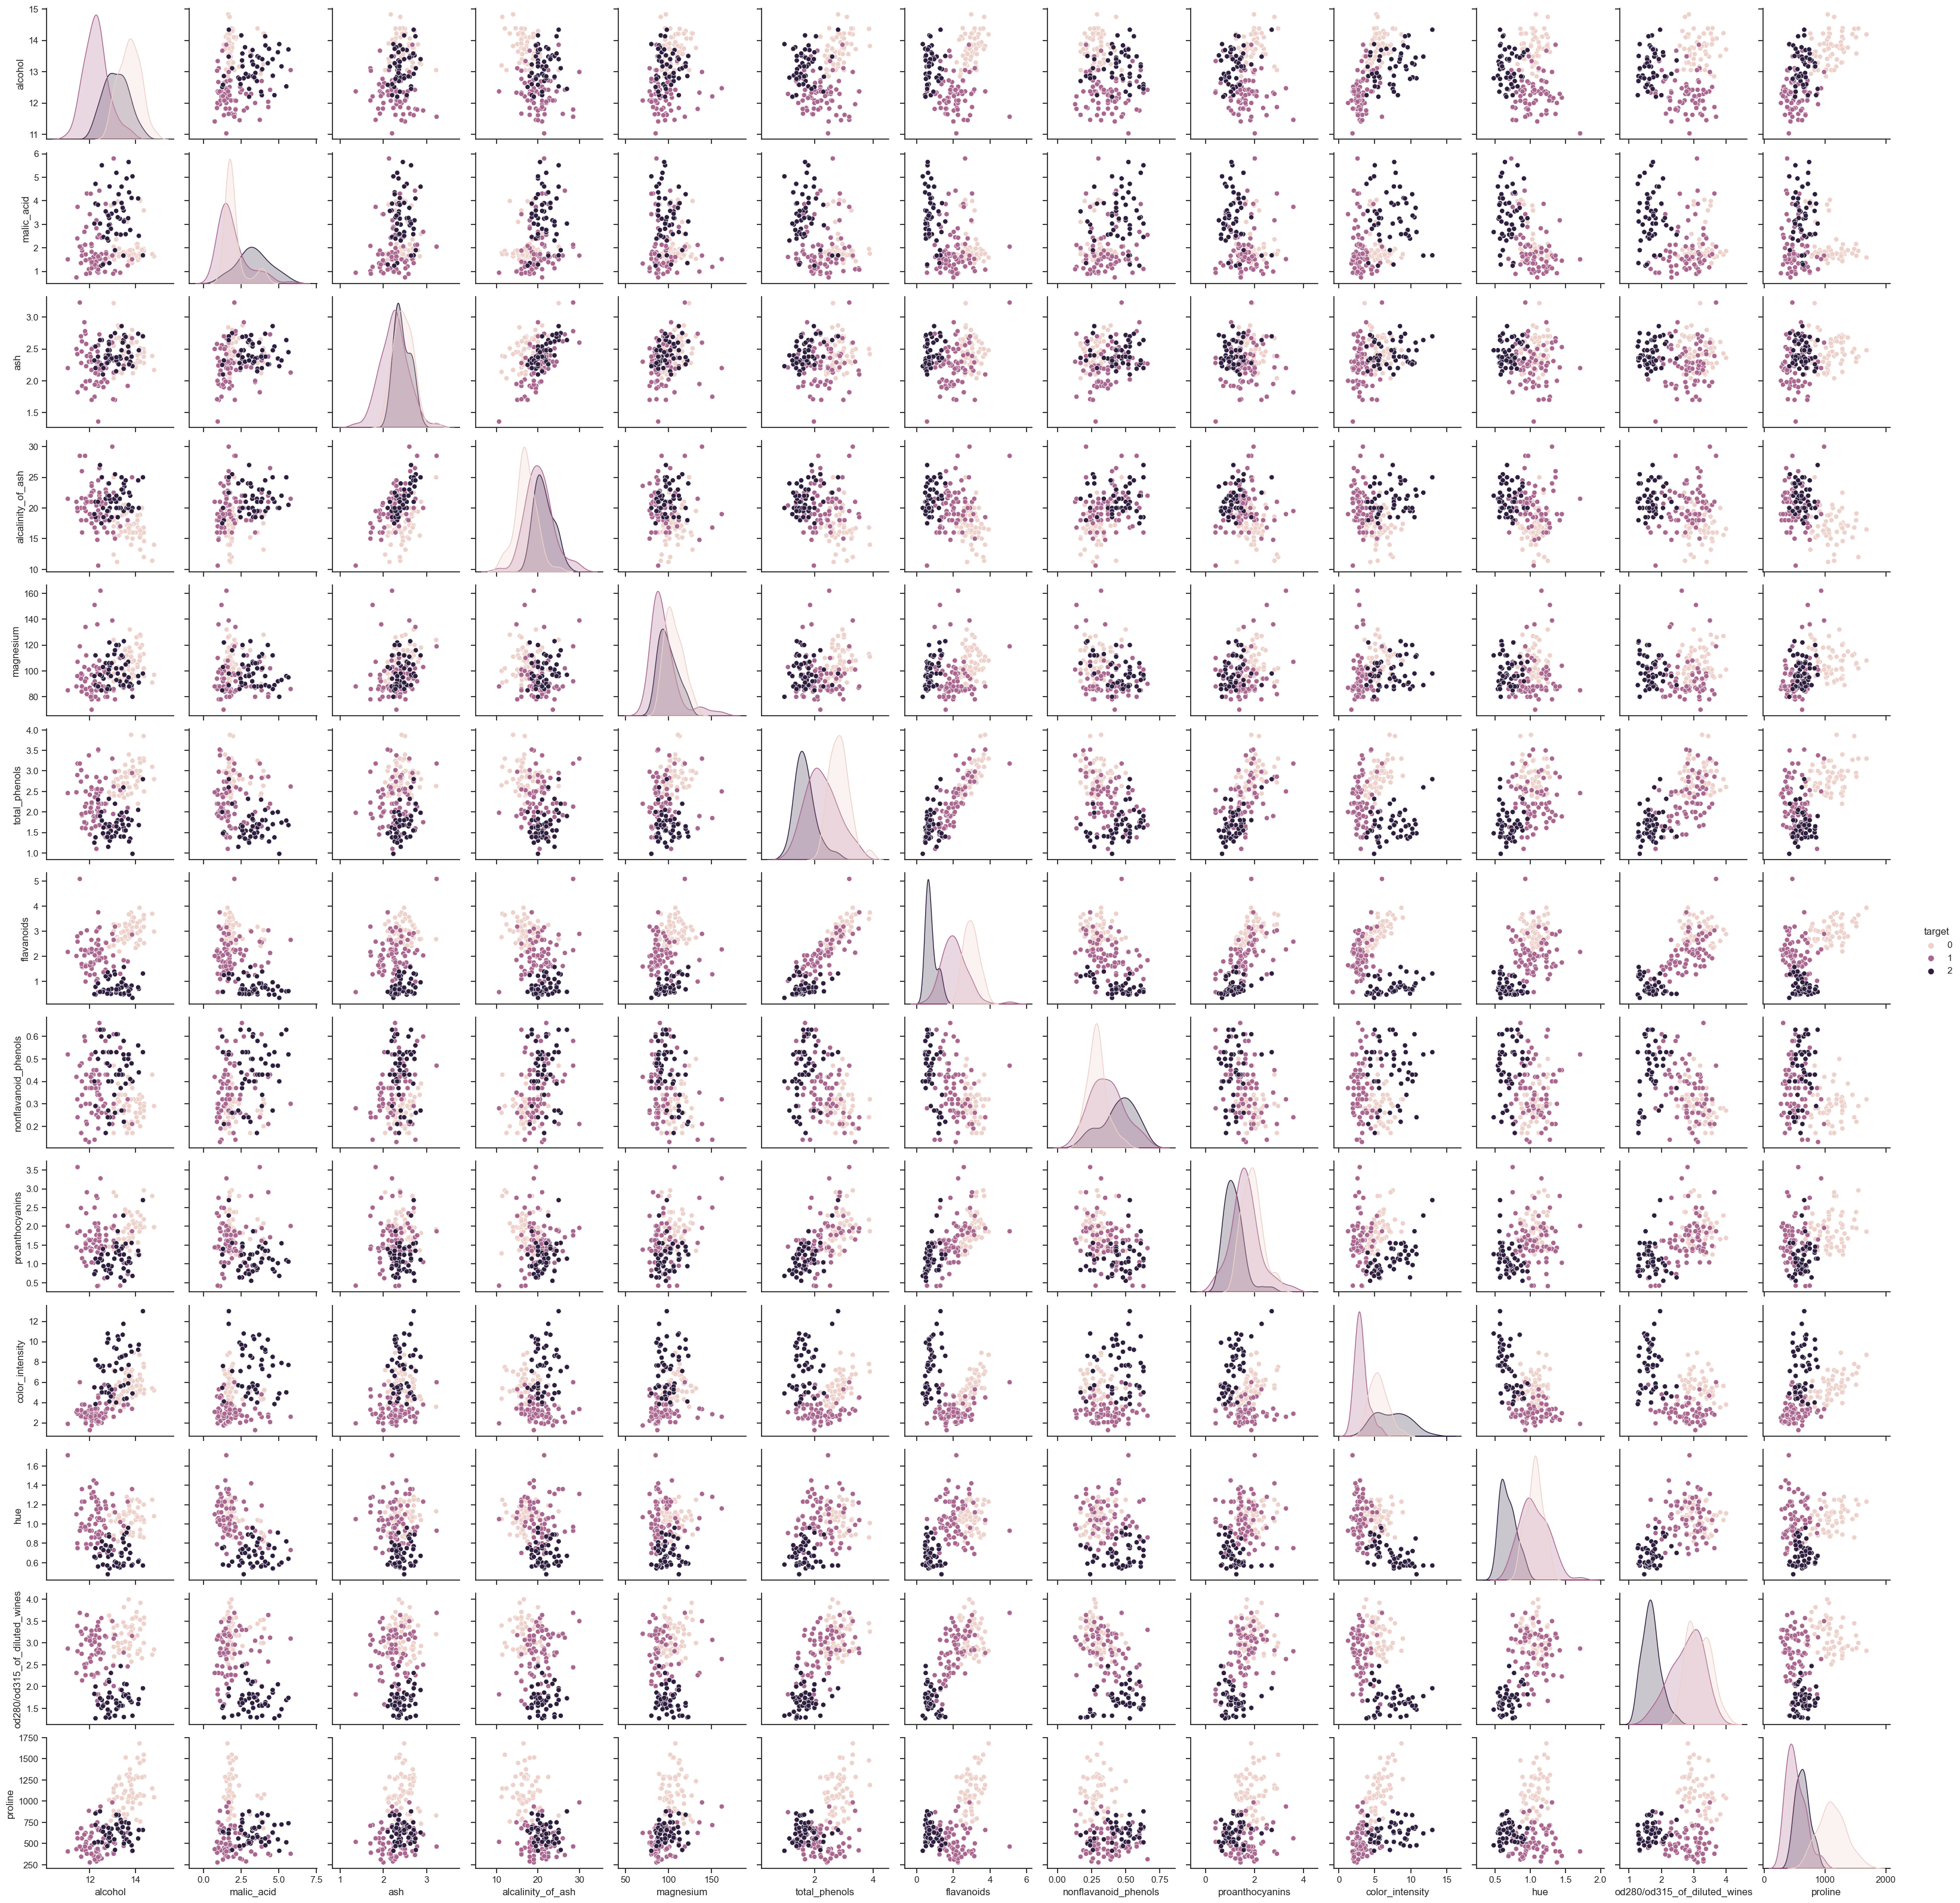

In [73]:
sns.pairplot(df, hue="target")

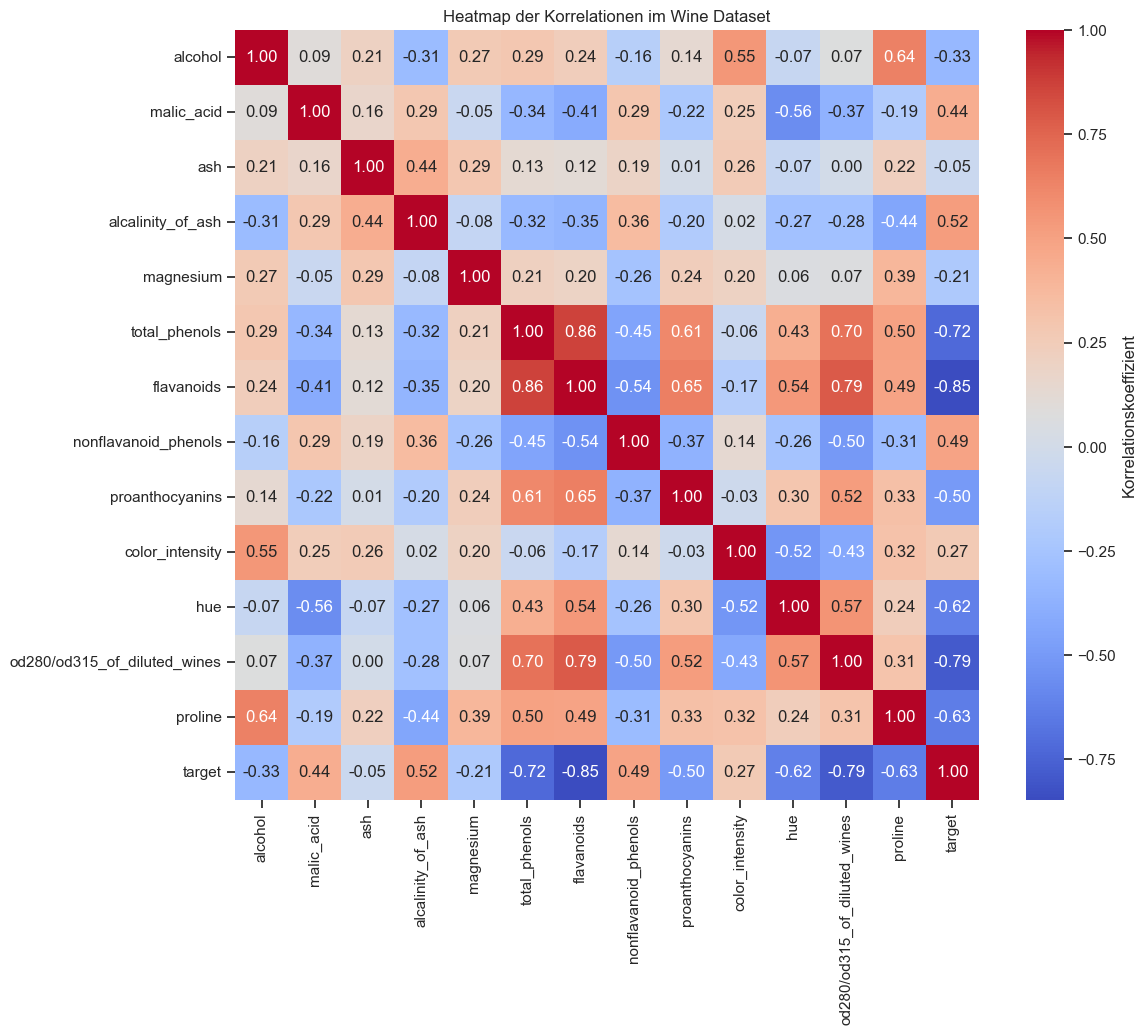

In [74]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Korrelationskoeffizient'})
plt.title('Heatmap der Korrelationen im Wine Dataset')
plt.show()


In [75]:
# Skalieren der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # transformation: (x-mu)/sigma, Mittelwert wird abgezogen und durch Varianz geteilt


In [76]:
# Hauptkomponentenanalyse durchführen
pca = PCA(n_components=13) # Die maximale Anzahl von Hauptkomponenten wird berechnet
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)



(178, 13)


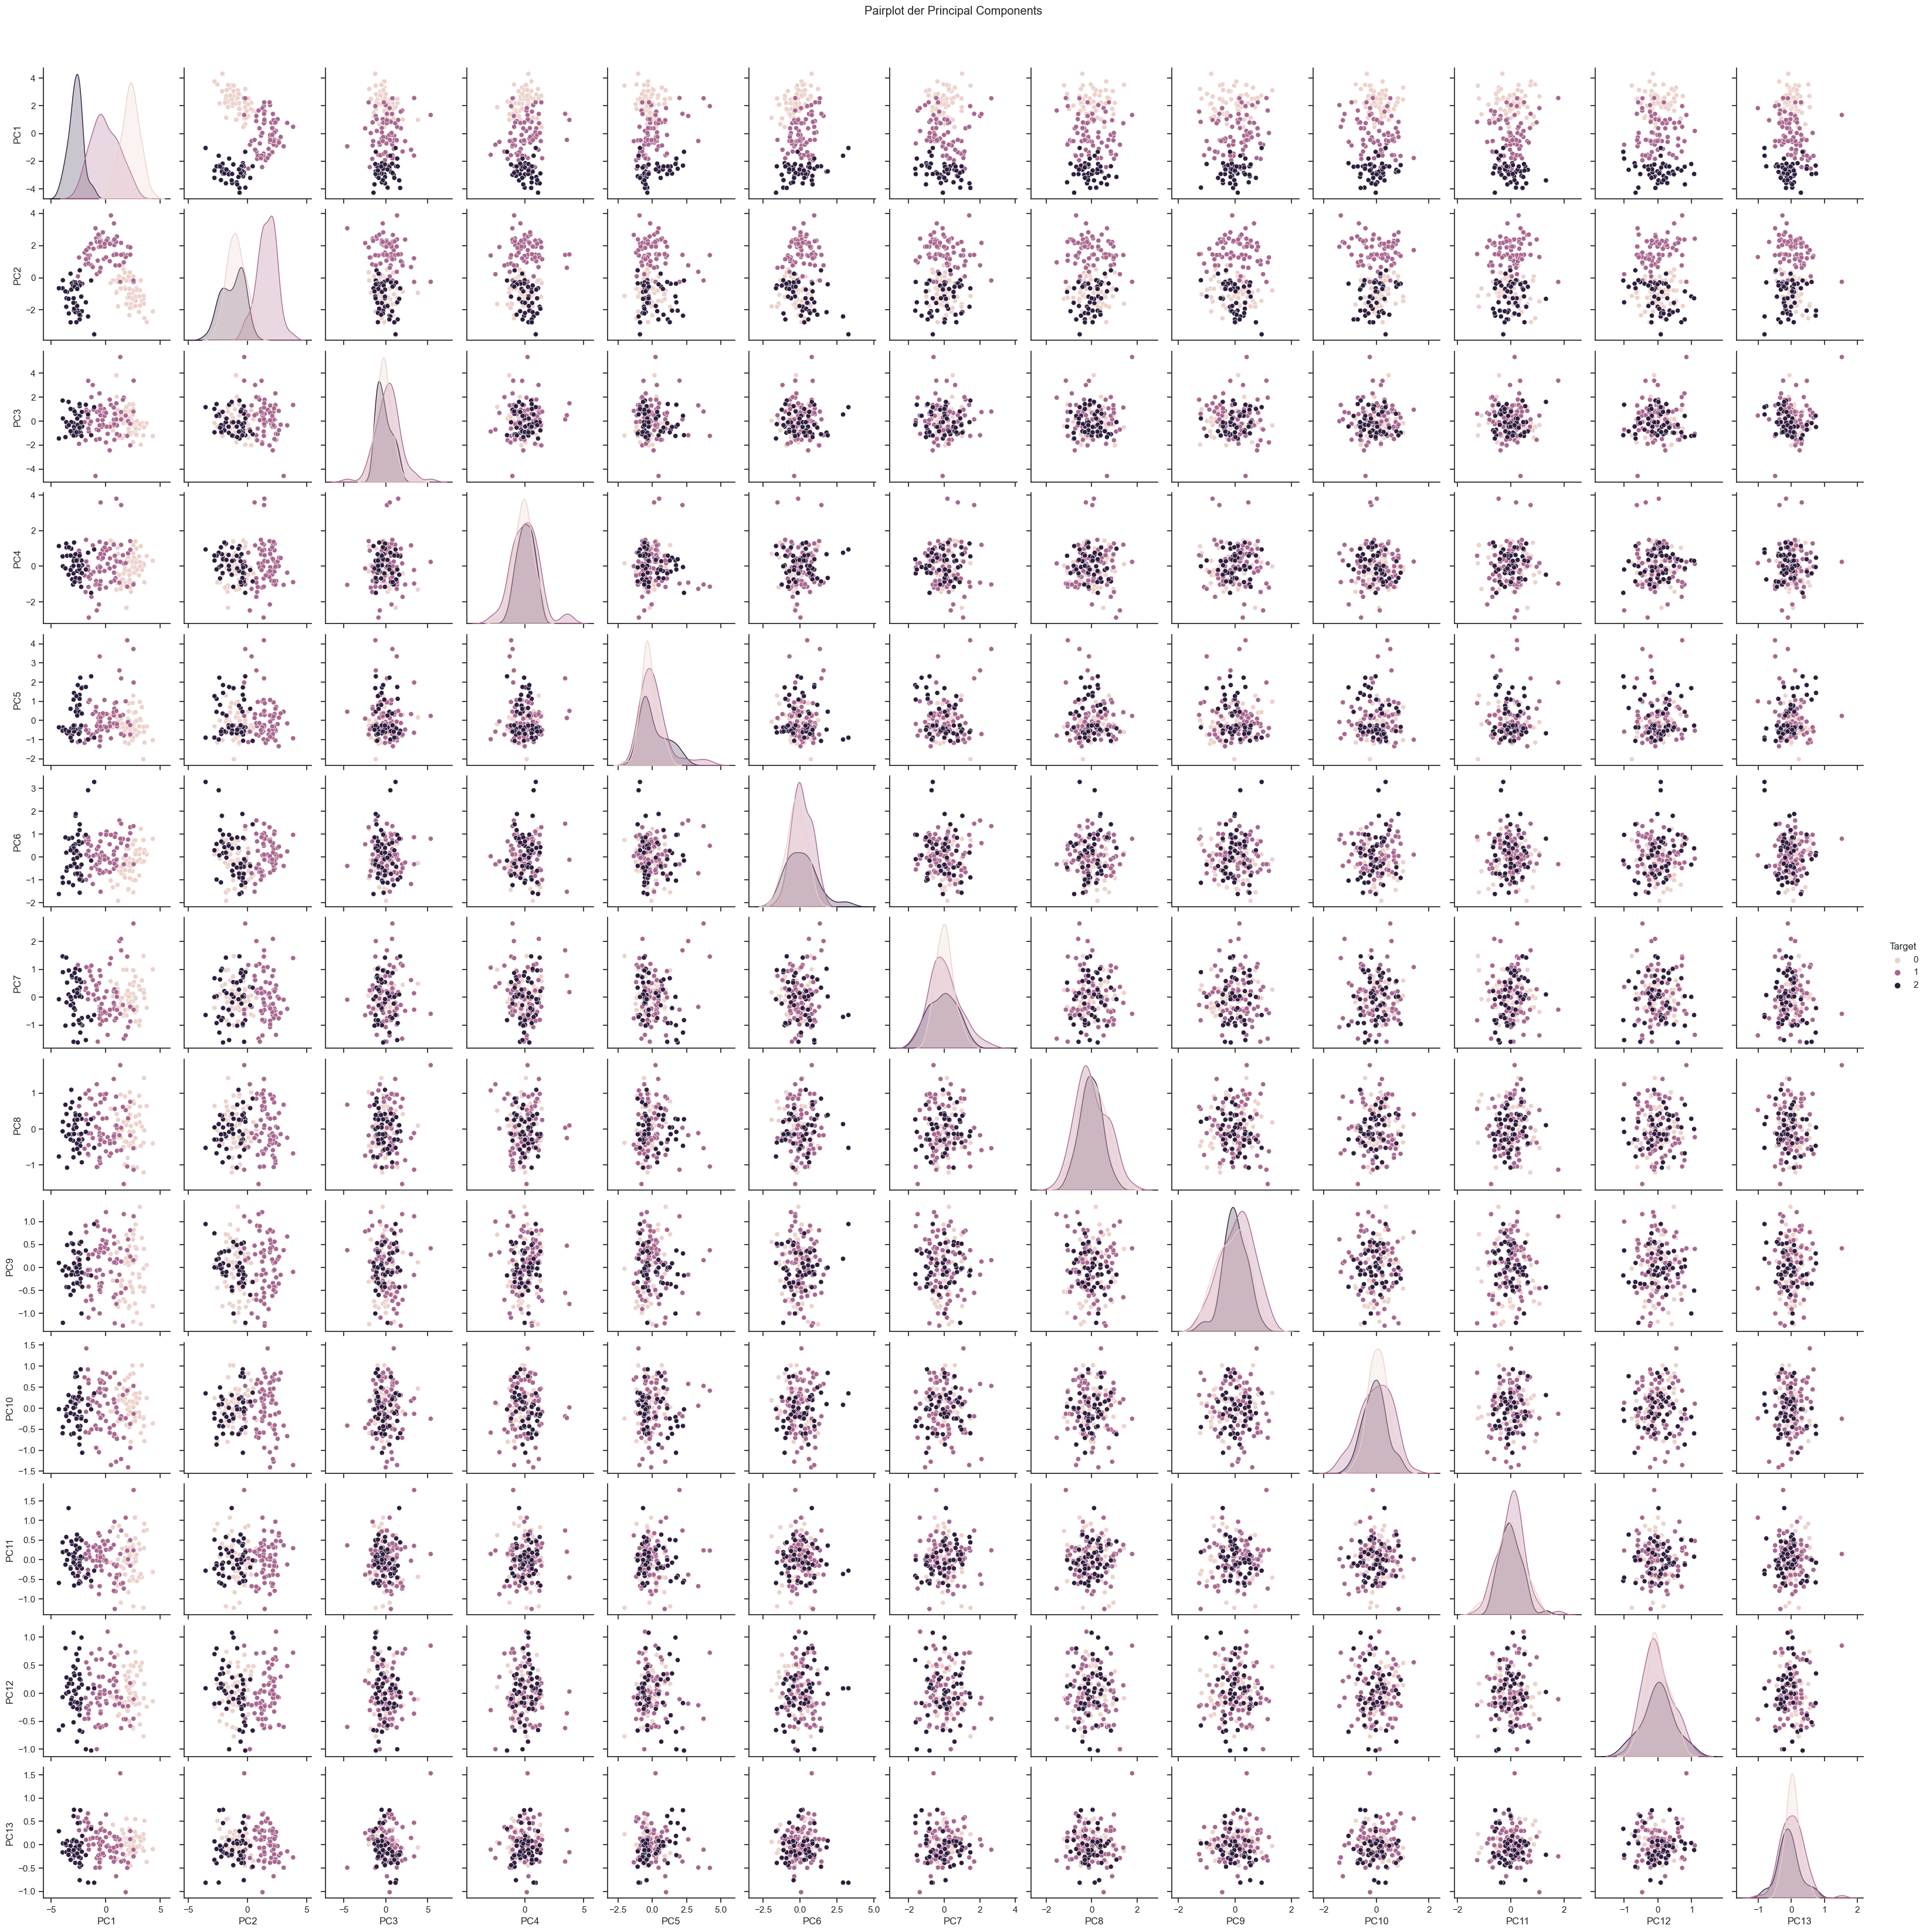

In [77]:
# Pairplot der 13 Hauptkomponenten

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
pca_df['Target'] = y

sns.pairplot(pca_df, hue='Target', vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
plt.suptitle('Pairplot der Principal Components', y=1.02)  # Adjust y for title space
plt.show()



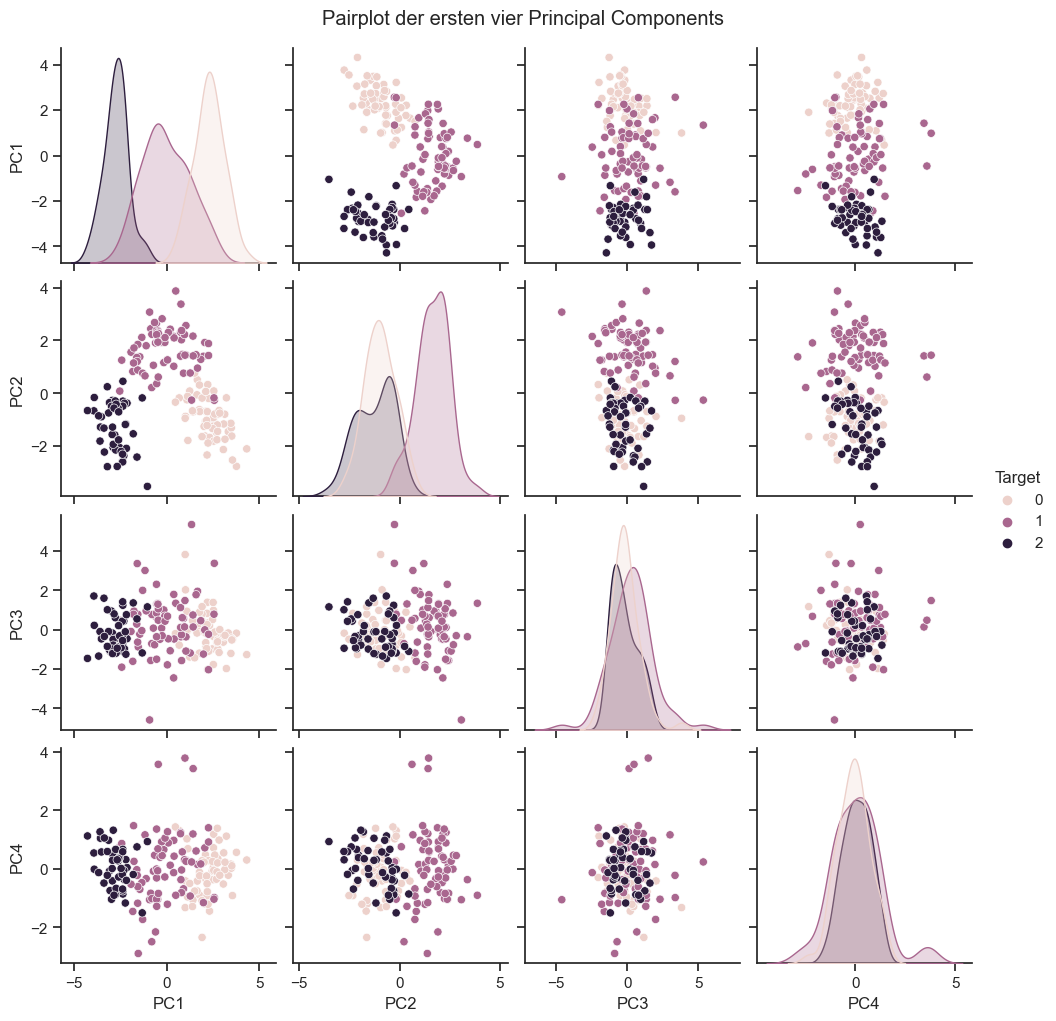

In [78]:
# Pairplot der ersten 4 Hauptkomponenten
pca_df = pd.DataFrame(X_pca[:,0:4], columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Target'] = y

sns.pairplot(pca_df, hue='Target', vars=['PC1', 'PC2', 'PC3', 'PC4'])
plt.suptitle('Pairplot der ersten vier Principal Components', y = 1.02) 
plt.show()

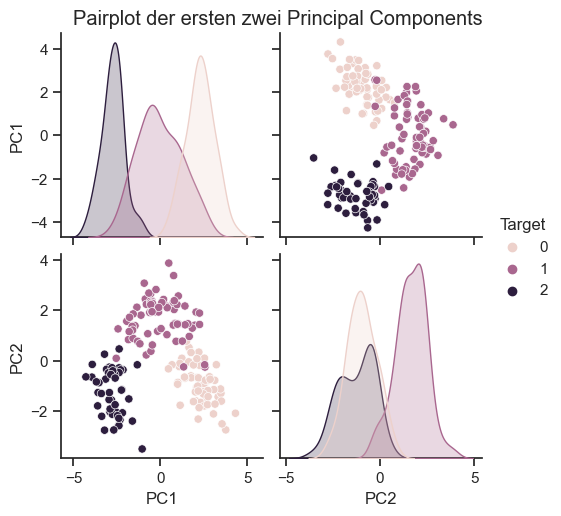

In [80]:
# Pairplot der ersten 2 Hauptkomponenten
pca_df = pd.DataFrame(X_pca[:,0:2], columns=['PC1', 'PC2'])
pca_df['Target'] = y

sns.pairplot(pca_df, hue='Target', vars=['PC1', 'PC2'])
plt.suptitle('Pairplot der ersten zwei Principal Components', y = 1.02) 
plt.show()

In [59]:
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()
print(explained_variance_cumulative)


[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


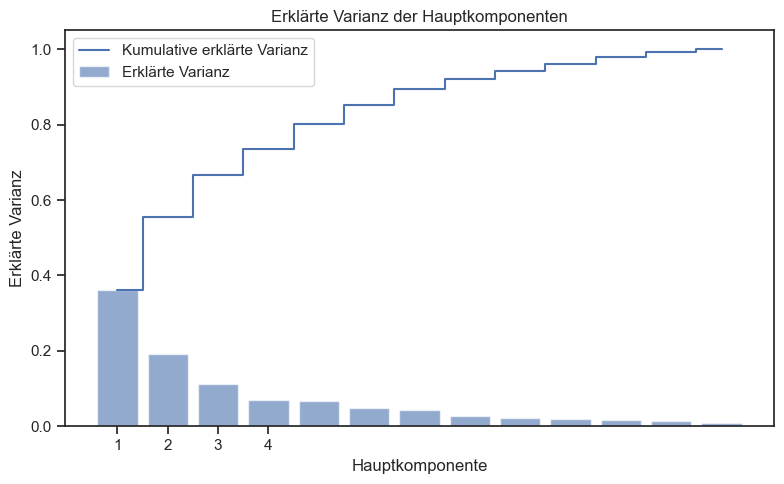

In [63]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, 14), explained_variance, alpha=0.6, align='center', label='Erklärte Varianz')
plt.step(range(1, 14), explained_variance_cumulative, where='mid', label='Kumulative erklärte Varianz')
plt.ylabel('Erklärte Varianz')
plt.xlabel('Hauptkomponente')
plt.title('Erklärte Varianz der Hauptkomponenten')
plt.xticks(range(1, 5))
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [58]:
# Berechnung der Loadings
first_component_loadings = pca.components_[0]
second_component_loadings = pca.components_[1]

feature_names = data.feature_names
loadings_1_df = pd.DataFrame(first_component_loadings, index=feature_names, columns=['Loading'])
loadings_2_df = pd.DataFrame(second_component_loadings, index=feature_names, columns=['Loading'])

loadings_1_df['abs_Loading'] = loadings_1_df['Loading'].abs()
loadings_2_df['abs_Loading'] = loadings_2_df['Loading'].abs()
sorted_loadings_1 = loadings_1_df.sort_values(by='abs_Loading', ascending=False).drop(columns='abs_Loading')
sorted_loadings_2 = loadings_2_df.sort_values(by='abs_Loading', ascending=False).drop(columns='abs_Loading')
print(sorted_loadings_1, '\n')
print(sorted_loadings_2)


                               Loading
flavanoids                    0.422934
total_phenols                 0.394661
od280/od315_of_diluted_wines  0.376167
proanthocyanins               0.313429
nonflavanoid_phenols         -0.298533
hue                           0.296715
proline                       0.286752
malic_acid                   -0.245188
alcalinity_of_ash            -0.239320
alcohol                       0.144329
magnesium                     0.141992
color_intensity              -0.088617
ash                          -0.002051 

                               Loading
color_intensity              -0.529996
alcohol                      -0.483652
proline                      -0.364903
ash                          -0.316069
magnesium                    -0.299634
hue                           0.279235
malic_acid                   -0.224931
od280/od315_of_diluted_wines  0.164496
total_phenols                -0.065040
proanthocyanins              -0.039302
nonflavanoid_phenols   

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# MNIST-Daten laden
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

# Filtere nur die Bilder der Ziffer 1
X_1 = X[y == '1']

/Users/schoch/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [94]:
X.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [83]:
# PCA durchführen
pca = PCA(n_components=10)
X_1_transformed = pca.fit_transform(X[y == '1'])
eigenfaces = pca.components_.reshape((10, 28, 28))


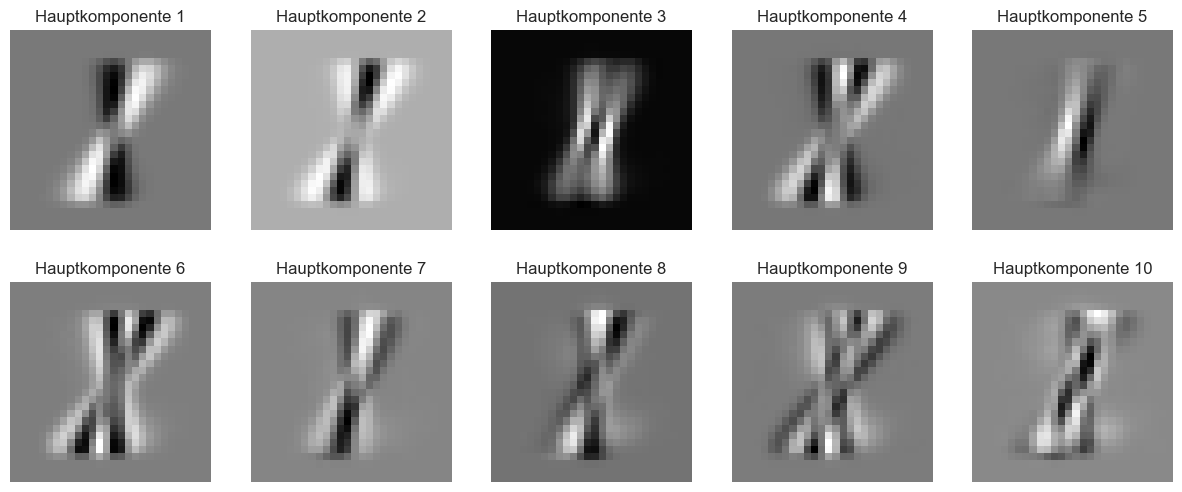

In [95]:
# Eigenfaces anzeigen
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f'Hauptkomponente {i+1}')
    ax.axis('off')
plt.show()


In [90]:
print(X.head())
print(X.shape)
print(X.info())
X.describe()

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      4.256304      2.783732   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

           pixel778      pixel779      pixel780  pixel781  pixel782  pixel783  \
count  70000.000000  70000.000000  70000.000000   70000.0   70000.0   70000.0   
mean       0.016614      0.012957      0.001714       0.0       0.0       0.0   
std        1.561822      1.553796      0.320889       0.0       0.0       0.0   
min        0.000000      0.000000      0.000000       0.0       0.0       0.0   
25%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
50%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
75%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
max      253.000000    254.000000     62.000000       0.0       0.0       0.0   

       pixel784  
count   70000.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 784 columns]